<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_20a_Quantum_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit --quiet && pip install pylatexenc --quiet && pip install qiskit-aer --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.1 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

import qiskit
from qiskit import QuantumCircuit, transpile, Aer

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import Diagonal, GroverOperator
from qiskit.circuit.library import QFT

In [6]:
def grover_operator(n_iterations):
  # Oracolo con cinque -1 sulla diagonale
  oracle = Diagonal([1,1,-1,1,1,1,1,-1,1,1,-1,-1,1,1,-1,1])

  # Creo il circuito di Grover a partire dall'oracolo con n iterazioni
  grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
  grover_it.label = f"Grover$^{n_iterations}$"

  # Restituisco la porta creata
  return grover_it

In [10]:
def qft_operator():
  qft_dagger = QFT(4, inverse=True).to_gate()
  qft_dagger.label = "QFT†"
  return qft_dagger

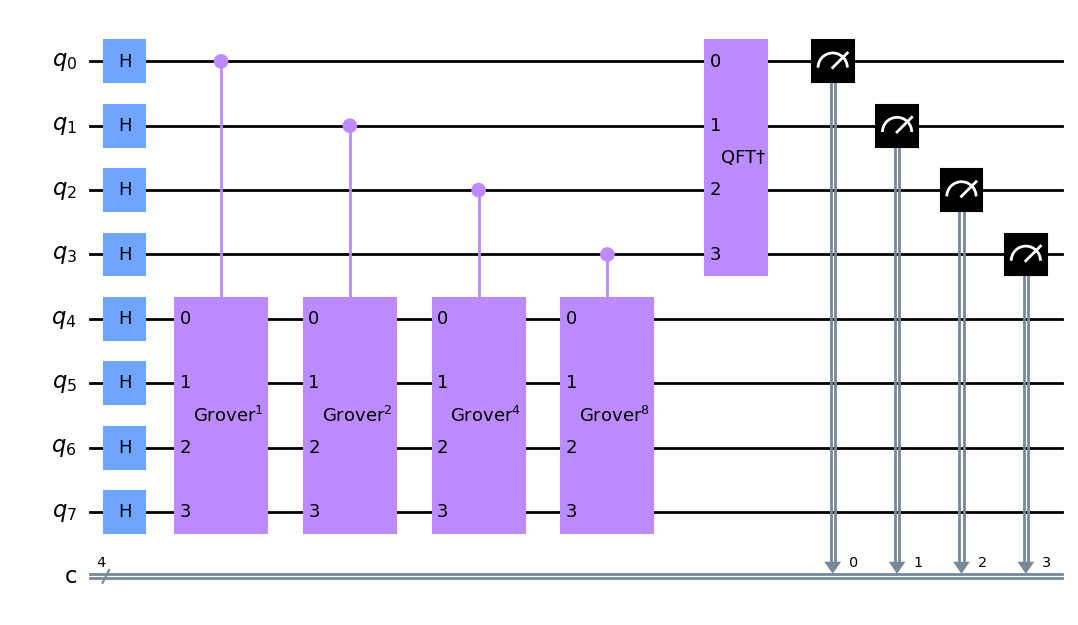

In [11]:
qc = QuantumCircuit(4+4, 4)
qc.h(range(4+4))

# Ad ogni qubit di conteggio
# Aggancio il circuito Grover controllato
# Raddoppiando ogni volta il numero di iterazioni
iterazioni = 1
for qubit in range(4):
  cgrit = grover_operator(iterazioni).control()
  qc.append(cgrit, [qubit] + list(range(4, 4+4)))
  iterazioni *= 2

# Applico la QFT inversa ai qubit di conteggio
qc.append(qft_operator(), range(4))

# Misuro i qubit di conteggio
qc.measure(range(4), range(4))

qc.draw(output="mpl")

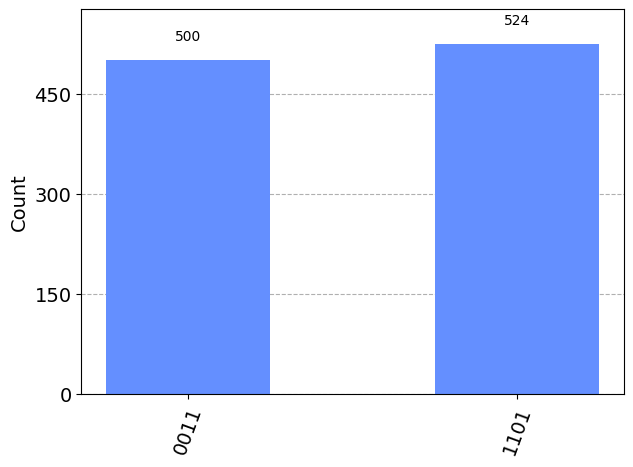

In [22]:
sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
counts = sim.run(transpiled_qc).result().get_counts()
plot_histogram(counts)

In [23]:
max_val = max(counts, key=counts.get)
max_val

'1101'

In [24]:
max_dec = int(max_val, 2)
max_dec

13

In [26]:
theta = (max_dec/(2**4))*math.pi*2
theta

5.105088062083414

In [27]:
N = 2**4
M = N * (math.sin(theta/2)**2)
M

4.938532541079281